### K-NN is a supervised learning algorithm.It predicts the class of the new data set based on the nearest K-classifier.It user distance matrix( Euclidean Distance,Manhattan distance or Minkowski distance) to calculate the distance between the new data point and its nearest K neighbors and assign the class of new data based on its neighbours.
### So finding optimal value of K is very much important as it reduces effect of the noise on the classification

### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Classified Data.txt',index_col=0)

In [3]:
data.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exploratory Data Analysis(EDA)

In [4]:
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
data.shape

(1000, 11)

In [6]:
data.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [7]:
data.empty

False

In [8]:
data.count()

WTT             1000
PTI             1000
EQW             1000
SBI             1000
LQE             1000
QWG             1000
FDJ             1000
PJF             1000
HQE             1000
NXJ             1000
TARGET CLASS    1000
dtype: int64

### Seperate Independent and Dependent Variables

In [9]:
X=data.loc[:,data.columns!='TARGET CLASS']
y=data['TARGET CLASS']

### Imbalance Data Check

In [10]:
y_data=pd.DataFrame(y)

In [11]:
y_data.groupby(by='TARGET CLASS')['TARGET CLASS'].count()

TARGET CLASS
0    500
1    500
Name: TARGET CLASS, dtype: int64

### Standardardize dataset

In [12]:
Std=StandardScaler()
std_data=Std.fit_transform(X)
std_data=pd.DataFrame(std_data,columns=[X.columns])
std_data.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
X_train,X_test,y_train,y_test=train_test_split(std_data,y,test_size=0.20,random_state=42)

### K-Nearest Neighbour 

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
y_pred=knn.predict(X_test)

### Result Visualization

In [17]:
conf=confusion_matrix(y_test,y_pred)

In [18]:
conf

array([[91,  7],
       [ 4, 98]], dtype=int64)

In [19]:
class_report=classification_report(y_test,y_pred)

In [20]:
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        98
           1       0.93      0.96      0.95       102

   micro avg       0.94      0.94      0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [21]:
acc=accuracy_score(y_test,y_pred)

In [22]:
print('Accuracy is {} %'.format(acc))

Accuracy is 0.945 %


### Finding Best Value of K (1st Method)

In [23]:
for i in range(1,40):
    print('K :',i)
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    y_pred1=knn1.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    print('Accuracy is {} %'.format(acc1))
    print('----------------------------------------------------------------')
    

K : 1
Accuracy is 0.945 %
----------------------------------------------------------------
K : 2
Accuracy is 0.935 %
----------------------------------------------------------------
K : 3
Accuracy is 0.945 %
----------------------------------------------------------------
K : 4
Accuracy is 0.95 %
----------------------------------------------------------------
K : 5
Accuracy is 0.95 %
----------------------------------------------------------------
K : 6
Accuracy is 0.945 %
----------------------------------------------------------------
K : 7
Accuracy is 0.945 %
----------------------------------------------------------------
K : 8
Accuracy is 0.945 %
----------------------------------------------------------------
K : 9
Accuracy is 0.955 %
----------------------------------------------------------------
K : 10
Accuracy is 0.96 %
----------------------------------------------------------------
K : 11
Accuracy is 0.955 %
----------------------------------------------------------------


# K=14

### Finding Best Value of K (2nd Method)

In [24]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

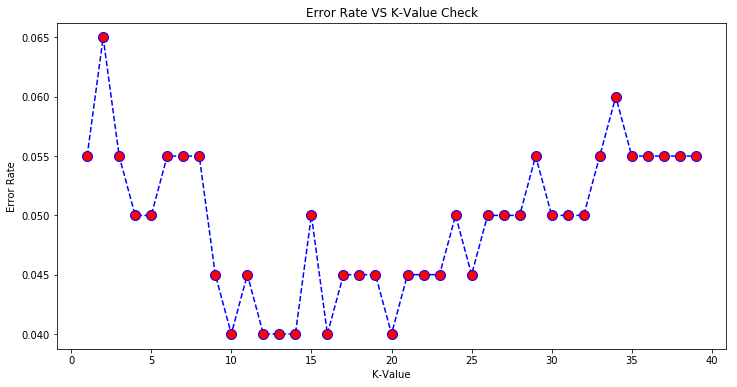

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K-Value Check')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

### Optimal Value of K=14

In [26]:
knn1=KNeighborsClassifier(n_neighbors=14)
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
print('Confusion Matrix \n',conf1)
class_report1=classification_report(y_test,y_pred1)
print('\nClssifification Report \n',class_report1)
acc1=accuracy_score(y_test,y_pred1)
print('Accuracy is {} %'.format(acc1))


Confusion Matrix 
 [[95  3]
 [ 5 97]]

Clssifification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       102

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy is 0.96 %
